# **1000-719bMSB Modeling of Complex Biological Systems**
# **Deep Neural Network: Spatial Transcriptomics**

# Spatial Transcriptomics

We are going to reproduce the results from the presentation.  
Download the ST data from [the author's website](https://www.spatialresearch.org/resources-published-datasets/doi-10-1126science-aaf2403/)

Load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#file = 'drive/MyDrive/Colab Notebooks/Rep01_MOB_count_matrix-1.tsv'
file = 'Rep1_MOB_count_matrix-1.tsv'
data_orig = pd.read_csv(file, sep='\t') 

In [3]:
data_orig

,Unnamed: 0,Nop58,Arl6ip4,Lix1,Chrm1,Nap1l1,Kat6a,Fam134c,Lrpprc,Srgap3,...,Gm5431,A630033H20Rik,Srd5a2,Olfr128,Sult5a1,Slc14a2,Lgals12,Gm14124,Olfr699,Zp3r
0,17.002x8.987,1,5,4,2,2,1,8,1,3,...,0,0,0,0,0,0,0,0,0,0
1,17.889x8.992,0,1,2,2,4,8,0,0,10,...,0,0,0,0,0,0,0,0,0,0
2,19.855x8.988,1,0,0,1,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,18.9x8.977,0,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.909x10.916,0,0,1,0,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.027x12.93,0,0,7,0,6,2,1,0,9,...,0,0,0,0,0,0,0,0,0,0
263,24.002x13.934,0,0,0,0,6,11,0,8,12,...,0,0,0,0,0,0,0,0,0,0
264,26.06x19.962,1,0,2,0,1,0,2,0,7,...,0,0,0,0,0,0,0,0,0,0
265,26.098x18.948,0,0,0,0,3,0,0,0,1,...,1,4,0,0,0,0,0,0,0,0


In [4]:
data_orig

,Unnamed: 0,Nop58,Arl6ip4,Lix1,Chrm1,Nap1l1,Kat6a,Fam134c,Lrpprc,Srgap3,...,Gm5431,A630033H20Rik,Srd5a2,Olfr128,Sult5a1,Slc14a2,Lgals12,Gm14124,Olfr699,Zp3r
0,17.002x8.987,1,5,4,2,2,1,8,1,3,...,0,0,0,0,0,0,0,0,0,0
1,17.889x8.992,0,1,2,2,4,8,0,0,10,...,0,0,0,0,0,0,0,0,0,0
2,19.855x8.988,1,0,0,1,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,18.9x8.977,0,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.909x10.916,0,0,1,0,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.027x12.93,0,0,7,0,6,2,1,0,9,...,0,0,0,0,0,0,0,0,0,0
263,24.002x13.934,0,0,0,0,6,11,0,8,12,...,0,0,0,0,0,0,0,0,0,0
264,26.06x19.962,1,0,2,0,1,0,2,0,7,...,0,0,0,0,0,0,0,0,0,0
265,26.098x18.948,0,0,0,0,3,0,0,0,1,...,1,4,0,0,0,0,0,0,0,0


### Some python list and pandas basics

List comprehensions are a concise way to create new lists from existing ones.

In [5]:
list1 = list(range(0,10))
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
list1[2]

2

In [7]:
list1[2:5]

[2, 3, 4]

In [8]:
list2 = []
for i in list1:
    list2.append(i+1)
    
print(list2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [9]:
list3 = [i+1 for i in list1]

print(list3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


With pandas we can load, analyze and manipulate data

In [10]:
data_orig['Nop58'][:10]

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Nop58, dtype: int64

In [11]:
data_orig.columns

Index(['Unnamed: 0', 'Nop58', 'Arl6ip4', 'Lix1', 'Chrm1', 'Nap1l1', 'Kat6a',
       'Fam134c', 'Lrpprc', 'Srgap3',
       ...
       'Gm5431', 'A630033H20Rik', 'Srd5a2', 'Olfr128', 'Sult5a1', 'Slc14a2',
       'Lgals12', 'Gm14124', 'Olfr699', 'Zp3r'],
      dtype='object', length=16574)

In [12]:
names = list(data_orig.columns[1:]) #extract gene names
print(names[:10])

['Nop58', 'Arl6ip4', 'Lix1', 'Chrm1', 'Nap1l1', 'Kat6a', 'Fam134c', 'Lrpprc', 'Srgap3', 'Slc1a3']


In [13]:
#Elements of the dataset can be accessed with .iloc[row, column]
data_orig.iloc[0,1]

1

In [14]:
arr1 = np.array(data_orig)
print(arr1[0,1])

1


In [15]:
#.. or using column names via .loc[row, column name]
data_orig.loc[2:4,'Penk']

2    0
3    4
4    0
Name: Penk, dtype: int64

In [16]:
#To obtain all elements in a column use .iloc[:,column]
data_orig.iloc[:,1]

0      1
1      0
2      1
3      0
4      0
      ..
262    0
263    0
264    1
265    0
266    0
Name: Nop58, Length: 267, dtype: int64

### Cast into matrix form

The data is formatted such that the first column gives the pair of coordinates and subsequent coordinates the gene count.  
For our purposes it will be more convenient to bring the data into matrix form, one matrix for each gene and the entries of the matrices are the counts for this gene at each position.

In [17]:
coord1 = data_orig.iloc[0,0]
print(coord1)

17.002x8.987


In [18]:
coord1.partition('x')

('17.002', 'x', '8.987')

In [19]:
x = [float(i.partition('x')[0]) for i in data_orig.iloc[:,0]]
y = [float(i.partition('x')[2]) for i in data_orig.iloc[:,0]]

In [20]:
print('x: ', x[:10])
print('y: ', y[:10])

x:  [17.002, 17.889, 19.855, 18.9, 20.909, 20.929, 20.903, 20.899, 18.907, 19.904]
y:  [8.987, 8.992, 8.988, 8.977, 10.916, 9.917, 12.897, 11.92, 9.97, 9.992]


In [21]:
# since coordinates are non-integer we need to round them
x_round = [int(i+0.5) for i in x] 
y_round = [int(i+0.5) for i in y]

In [22]:
print('x: ', x_round[:10])
print('y: ', y_round[:10])

x:  [17, 18, 20, 19, 21, 21, 21, 21, 19, 20]
y:  [9, 9, 9, 9, 11, 10, 13, 12, 10, 10]


In [23]:
data = []
    
#loop over genes
for i in range(1,data_orig.shape[1]):
    mat = np.zeros([32,32])
    #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_orig.iloc[:,i]):
        mat[y_,x_] = val
    #scaling the data on each gene from 0 to 1
    mat = mat/(mat.max())
    data.append(mat)
data = np.array(data)

In [24]:
data.shape

(16573, 32, 32)

In [25]:
gene_id = names.index('Penk')
print(gene_id)

1553


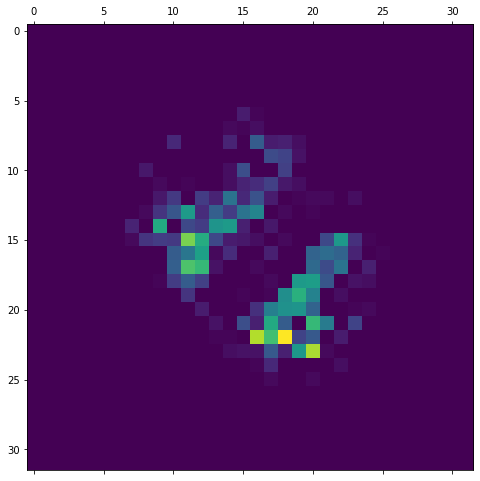

In [26]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(data[gene_id])

### Plotting overlay with histological image

We want to create a plot of an image taken with microscope overlayed with the gene counts.  
Since this image has a high resolutions we need to first upscale the coordinates accordingly using the transformaion that comes with the dataset.

In [27]:
img = plt.imread('HE_Rep1.jpeg')

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2837: DecompressionBombWarning: Image size (92080232 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [28]:
img.shape

(9931, 9272, 3)

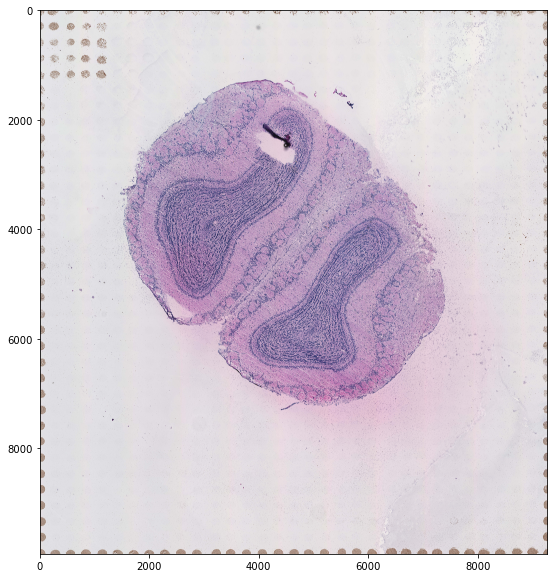

In [29]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(img)

In [30]:
file = open('Rep1_MOB_transformation.txt','r')
for line in file:
    split = line.split(' ')
align = [float(i) for i in split]

print(align)

[289.75, 0.0, 0.0, 0.0, 292.08, 0.0, -289.75, -292.08, 1.0]


In [31]:
#alignments are used to scale and shift the coordinates to match the histological picture
x_up = [i*align[0]+align[6] for i in x]
y_up = [i*align[4]+align[7] for i in y]

In [32]:
print(x_up[:5])
print(y_up[:5])

[4636.5795, 4893.58775, 5463.23625, 5186.525, 5768.63275]
[2332.84296, 2334.3033600000003, 2333.1350399999997, 2329.92216, 2896.26528]


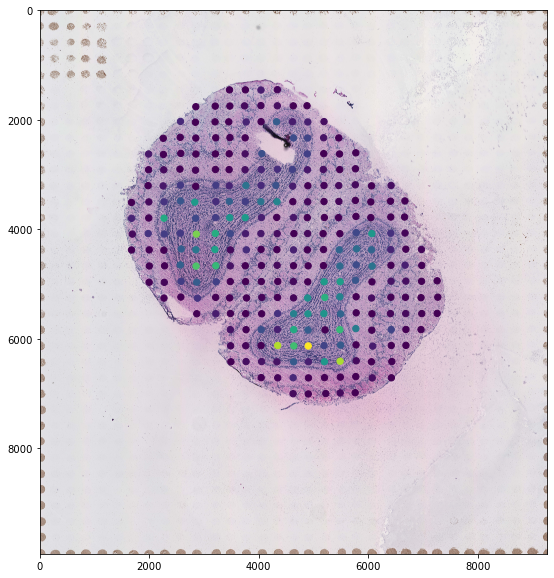

In [33]:
#list of gene counts for penk
spots = data_orig.loc[:,'Penk']

plt.scatter(x_up, y_up, c = spots, s = 40)
plt.imshow(img)

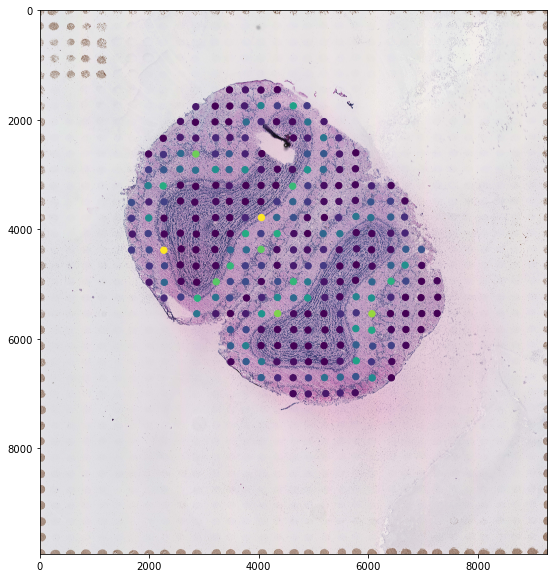

In [34]:
spots = data_orig.loc[:,'Doc2g']

plt.scatter(x_up, y_up, c = spots, s = 40)
plt.imshow(img)

### Scatter plot of gene expressions in two areas

We select three areas and compare the average gene counts in scatter plots.

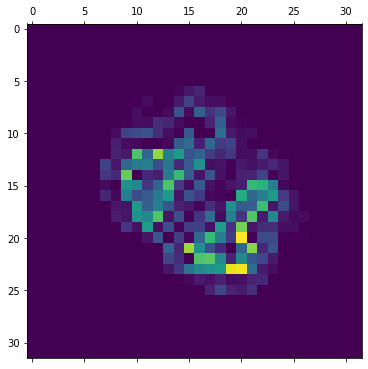

In [35]:
plt.rcParams["figure.figsize"] = (6,6)
gene_id = names.index('Gad1')
plt.matshow(data[gene_id])

Define the three areas by these coordinate pairs

In [36]:
area_a = [(15,9),(15,10),(15,11),
          (16,9),(16,10),(16,11),
          (17,9),(17,10),(17,11)]

area_b = [(21,17),(21,18),(21,19),
          (22,17),(22,18),(22,19),
          (23,17),(23,18),(23,19)]

area_c = [(17,15),(15,17),(14,19),
          (16,18),(16,16),(19,14),
          (21,12),(18,16),(17,17)]

To visualize we create three matrices which highlight the areas and plot them

In [37]:
mat_a = np.zeros( (32,32) )
for c in area_a:
    x=c[1]
    y=c[0]
    mat_a[y,x] = 2
    
mat_b = np.zeros( (32,32) )
for c in area_b:
    x=c[1]
    y=c[0]
    mat_b[y,x] = 3
    
mat_c = np.zeros( (32,32) )
for c in area_c:
    x=c[1]
    y=c[0]
    mat_b[y,x] = 4

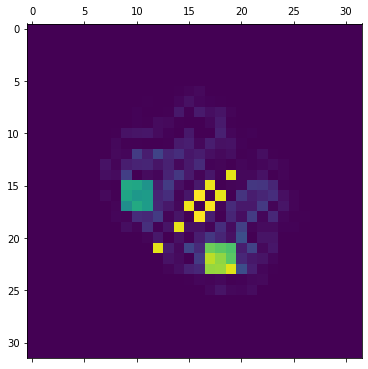

In [38]:
plt.matshow(mat_b+mat_a+mat_c+data[gene_id])

Next we average the gene counts in the three areas

In [39]:
count_a = np.zeros( len(data) )
for c in area_a:
    x=c[1]
    y=c[0]
    count_a = count_a + data[:,y,x]
count_a = count_a / 9

count_b = np.zeros( len(data) )
for c in area_b:
    x=c[1]
    y=c[0]
    count_b = count_b + data[:,y,x]
count_b = count_b / 9

count_c = np.zeros( len(data) )
for c in area_c:
    x=c[1]
    y=c[0]
    count_c = count_c + data[:,y,x]
count_c = count_c / 9

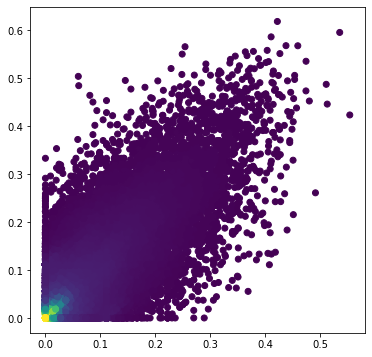

In [40]:
# Calculate the point density
# gaussian_kde(kernel density estimation) is a way to estimate the probability density function (PDF) of a random variable

from scipy.stats import gaussian_kde
xy = np.vstack([count_a,count_b])
z = gaussian_kde(xy)(xy)

plt.scatter(count_a, count_b, c=z)

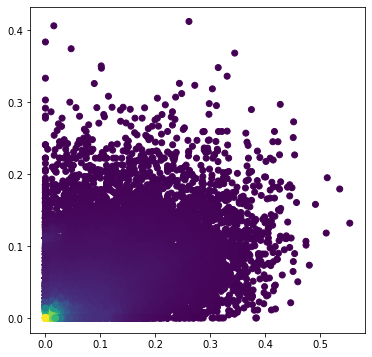

In [41]:
xy = np.vstack([count_a,count_c])
z = gaussian_kde(xy)(xy)

plt.scatter(count_a, count_c, c=z)

Calculate pearson correlation, as expected the similar regions a and b are higher correlated than a and c

In [42]:
from scipy.stats import pearsonr

print('pearson a,b: ', pearsonr(count_a, count_b))
print('pearson a,c: ', pearsonr(count_a, count_c))

pearson a,b:  (0.7668108660328982, 0.0)
pearson a,c:  (0.4572741611362924, 0.0)


### Dimensional reduction

We will use two techniques for dimensional reduction: PCA and t-sne.  
First we choose three areas which correspond to morphological layers and will only consider these for PCA.

To this end we create three lists which contain the locations of above-average expression for the genes Penk, Doc2g and Kctd12

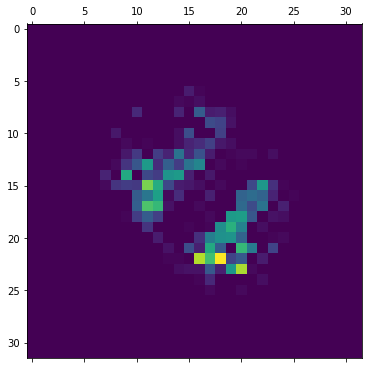

In [43]:
gene_id = names.index('Penk')
plt.matshow(data[gene_id])

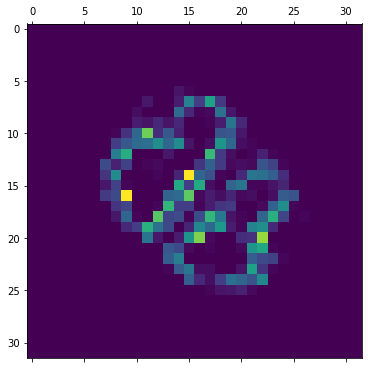

In [44]:
gene_id = names.index('Doc2g')
plt.matshow(data[gene_id])

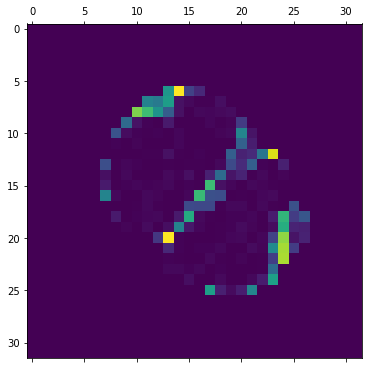

In [45]:
gene_id = names.index('Kctd12')
plt.matshow(data[gene_id])

In [46]:
Penk_avg = np.average(data_orig['Penk'])
Doc2g_avg = np.average(data_orig['Doc2g'])
Kctd12_avg = np.average(data_orig['Kctd12'])

layer1 = []
for i,j in enumerate(data_orig['Penk']):
    if(j > 1.2*Penk_avg): layer1.append(i)
        
layer2 = []
for i,j in enumerate(data_orig['Doc2g']):
    if(j > 1.2*Doc2g_avg): layer2.append(i)
        
layer3 = []
for i,j in enumerate(data_orig['Kctd12']):
    if(j > 1.2*Kctd12_avg): layer3.append(i)
        
#We stack the lists together, these are the locations we consider for PCA
layer_all = layer1+layer2+layer3

In [47]:
from sklearn.decomposition import PCA
#Create object from class PCA
pca = PCA(n_components=2)

In [48]:
#Only keep data for the chosen position, omit column with coordinates
data_reduced = data_orig.iloc[layer_all,1:]

In [49]:
layer_all[:10]

[0, 1, 12, 13, 36, 37, 40, 41, 42, 50]

In [50]:
data_reduced.shape

(205, 16573)

In [51]:
data_orig.shape

(267, 16574)

In [52]:
data_pca = pca.fit_transform(data_reduced)

In [53]:
data_pca.shape

(205, 2)

In [54]:
l1 = [1]*len(layer1)
l2 = [2]*len(layer2)
l3 = [3]*len(layer3)

colormap = l1+l2+l3

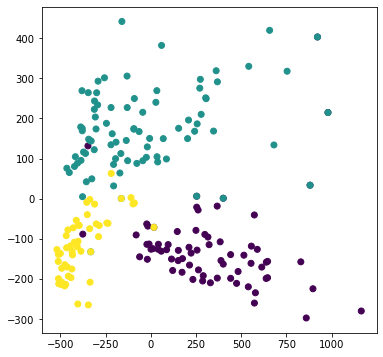

In [55]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=colormap)

Now we will perform dimension reduction using t-sne

In [56]:
import numpy as np
from sklearn.manifold import TSNE

In [57]:
data_embedded = TSNE(n_components=2).fit_transform(data_reduced)

In [58]:
data_embedded.shape

(205, 2)

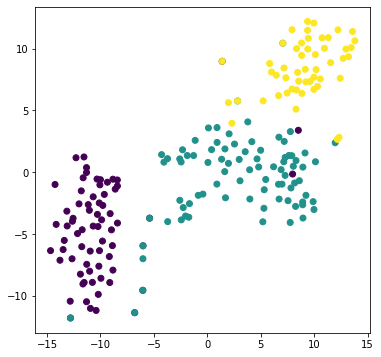

In [59]:
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=colormap)

In [60]:
# umap may be difficult on colab. make sure to install umap-learn
# https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi
#!pip uninstall umap
!pip install 'umap-learn==0.3.10'

     |████████████████████████████████| 40 kB 1.3 MB/s eta 0:00:011
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38881 sha256=10ac813c6c9d4383f02e3c817be6c28b610dd6f6105ad8da9b2ed308a6756b5f
  Stored in directory: /Users/jakub/Library/Caches/pip/wheels/ea/d0/8f/9e64bfc5ed0645f89b639196bef92daf5c704285133efce12f
Successfully built umap-learn
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.5.1
    Uninstalling umap-learn-0.5.1:
      Successfully uninstalled umap-learn-0.5.1


In [61]:
import umap.umap_ as umap

In [62]:
reducer2d = umap.UMAP(n_components=2)

In [63]:
data_umap2d = reducer2d.fit_transform(data_reduced)

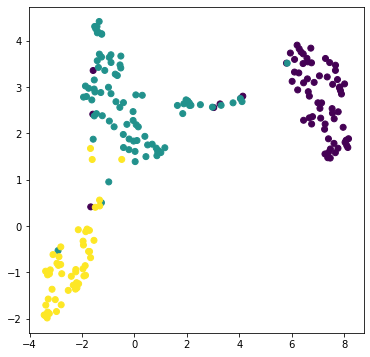

In [64]:
plt.scatter(data_umap2d[:,0], data_umap2d[:,1], c=colormap)

In [65]:
# UMAP can have more than 2 dimensions
reducer = umap.UMAP(n_components=3)
data_umap = reducer.fit_transform(data_orig.iloc[:,1:])
data_umap.shape

(267, 3)

In [66]:
#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [67]:
mats1 = []
for i in range(3):
    mat = np.zeros([32,32])
        #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_umap[:,i]):
        mat[y_,x_] = val
    mat = deprocess_image(mat)
    mats1.append(mat)
mats1 = np.stack(mats1, axis=2)

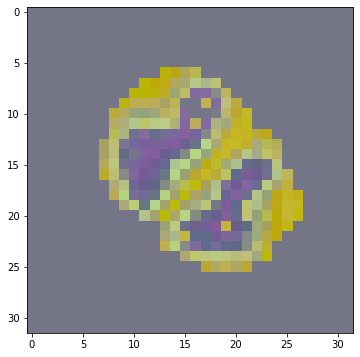

In [68]:
plt.imshow(mats1)

In [69]:
data_tsne3d = TSNE(n_components=3).fit_transform(data_reduced)

In [70]:
mats2 = []
for i in range(3):
    mat = np.zeros([32,32])
        #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_tsne3d[:,i]):
        mat[y_,x_] = val
    mat = deprocess_image(mat)
    mats2.append(mat)
mats2 = np.stack(mats2, axis=2)

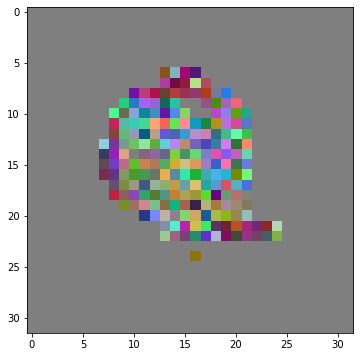

In [71]:
plt.imshow(mats2)

**HOMEWORK 2** 

Apply VAE on the above ST data. Modify the earlier VAE architecture (used on MNIST), such as input data dimensions and other parameters (strides, layers, etc). Keep the 2 dimensions as latent variables.

*   Visualize the latent variables in a scatter plot.
*   For 3 randomly chosen genes, visualize the input data and reconstructed data as 2D heatmaps.

Make sure to submit the jupyterlab code.

In [73]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

img_shape = (32, 32, 1)
batch_size = 16
latent_dim = 2

2.4.1


In [74]:
input_img = keras.Input(shape=img_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(2, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [75]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
    mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon
z = layers.Lambda(sampling)([z_mean, z_log_var])

encoder = Model(input_img, z)

In [76]:
decoder_input = layers.Input(K.int_shape(z)[1:])
x = layers.Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same', activation='sigmoid')(x)

decoder = Model(decoder_input, x)
z_decoded = decoder(z)

In [77]:
def vae_loss(input_img, z_decoded):
    input_img = K.flatten(input_img)
    z_decoded = K.flatten(z_decoded)
    xent_loss = keras.metrics.binary_crossentropy(input_img, z_decoded) 
    kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)

In [78]:
vae = Model(input_img, z_decoded)
vae.compile(optimizer='adam', loss=vae_loss)

In [79]:
vae.summary()
decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   36928       conv2d_1[0][0]                   
____________________________________________________________________________________________

In [84]:
x_test = data
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

In [85]:
vae.fit(x=x_test,y=x_test, shuffle=True, epochs=10, batch_size=batch_size)



Train on 16573 samples
Epoch 1/10
16573/16573 [==============================] - 51s 3ms/sample - loss: 0.0139
Epoch 2/10
16573/16573 [==============================] - 49s 3ms/sample - loss: 6.4275e-04
Epoch 3/10
16573/16573 [==============================] - 63s 4ms/sample - loss: 6.3226e-04
Epoch 4/10
16573/16573 [==============================] - 57s 3ms/sample - loss: 6.2985e-04
Epoch 5/10
16573/16573 [==============================] - 57s 3ms/sample - loss: 6.2812e-04
Epoch 6/10
16573/16573 [==============================] - 63s 4ms/sample - loss: 6.2575e-04
Epoch 7/10
16573/16573 [==============================] - 63s 4ms/sample - loss: 6.2388e-04
Epoch 8/10
16573/16573 [==============================] - 71s 4ms/sample - loss: 6.2342e-04
Epoch 9/10
16573/16573 [==============================] - 62s 4ms/sample - loss: 6.2300e-04
Epoch 10/10
16573/16573 [==============================] - 66s 4ms/sample - loss: 6.2295e-04


In [86]:
encoded = encoder.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [87]:
print(encoded)

[[-0.64707655 -0.9226264 ]
 [ 0.1503307   0.37922233]
 [ 0.9887684  -2.0493624 ]
 ...
 [ 1.6467617  -1.1184632 ]
 [-0.4311701   0.64824563]
 [ 0.3108092   0.74997103]]


[-0.64707655 -0.9226264 ]


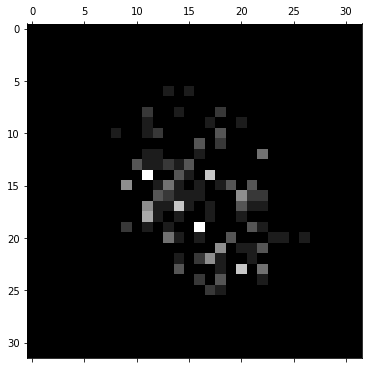

In [88]:
print(encoded[0])
plt.matshow(x_test[0][:,:,0], cmap='gray')

[0.1503307  0.37922233]


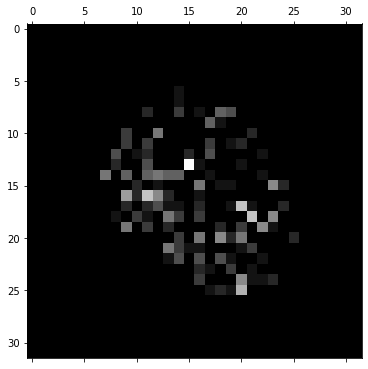

In [89]:
print(encoded[1])
plt.matshow(x_test[1][:,:,0], cmap='gray')

In [90]:
decoded = decoder.predict(encoded)

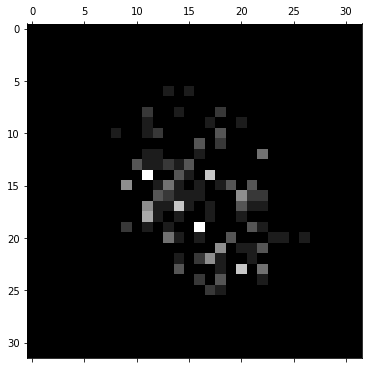

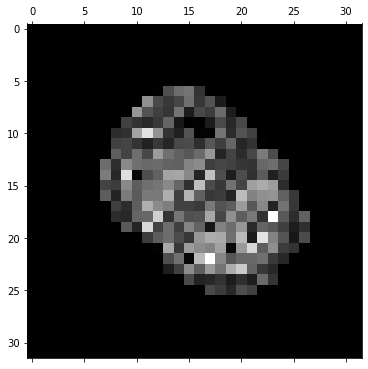

In [91]:
plt.matshow(x_test[0][:,:,0], cmap='gray')
plt.matshow(decoded[0][:,:,0], cmap='gray')

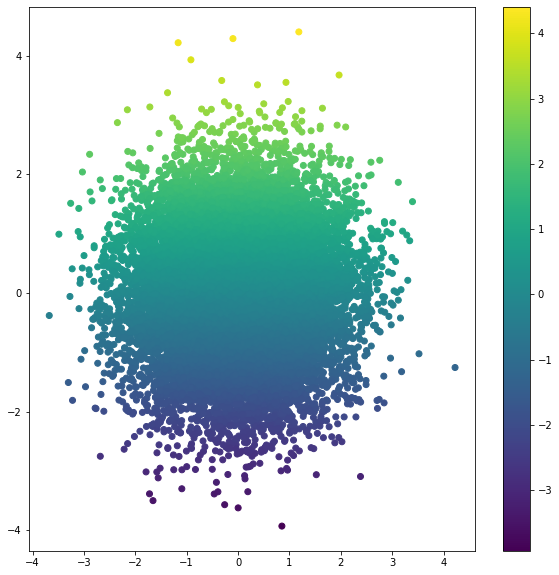

In [95]:
x_test_encoded = encoder.predict(x_test)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=x_test_encoded[:, 1])
plt.colorbar()
plt.show()

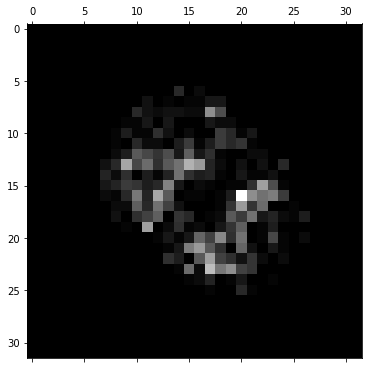

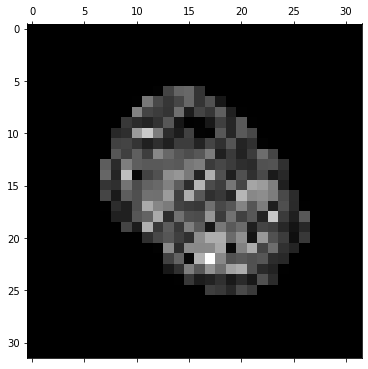

In [96]:
plt.matshow(x_test[2][:,:,0], cmap='gray')
plt.matshow(decoded[2][:,:,0], cmap='gray')

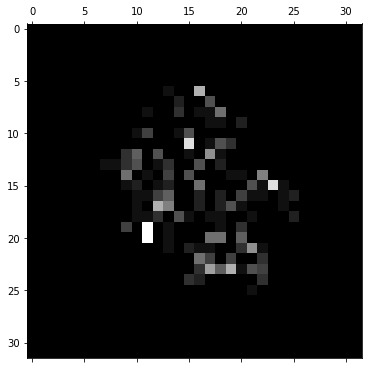

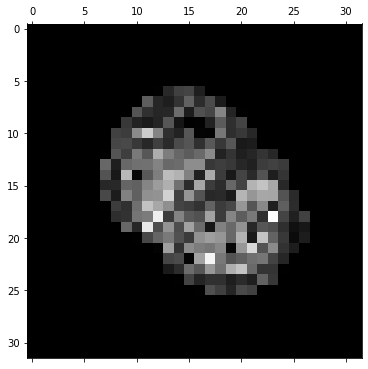

In [97]:
plt.matshow(x_test[666][:,:,0], cmap='gray')
plt.matshow(decoded[666][:,:,0], cmap='gray')

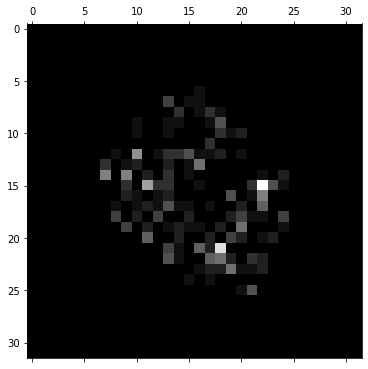

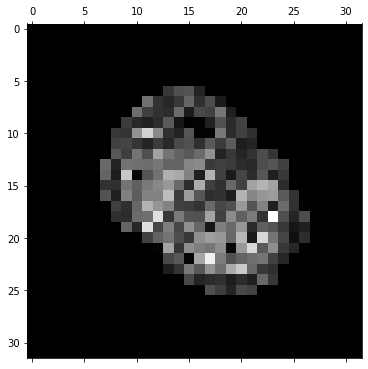

In [98]:
plt.matshow(x_test[2137][:,:,0], cmap='gray')
plt.matshow(decoded[2137][:,:,0], cmap='gray')